# L'algoritmo di Deutsch

L'algoritmo di Deutsch è un algoritmo che, in un solo passo, permette di verificare se una funzione booleana è costante o bilanciata. È un algoritmo giocattolo usato per dimostrare la superiorità quantistica: ciò che nel mondo classico richiederebbe almeno due passi, nel mondo quantistico si aggrega in un solo passo.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from BoredQiskit import FastQiskit as fq

In [ ]:
def deutsch_oracle(outs: list[int]):
    f = QuantumCircuit(2)
    if outs[0] != outs[1]:
        f.cx(0,1)
    if outs[0] != 0:
        f.x(1)
    return f

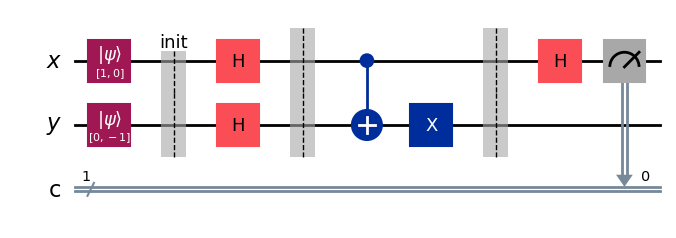

In [16]:
qx = QuantumRegister(1, 'x')
qy = QuantumRegister(1, 'y')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(qx,qy,c)
qc.initialize([1,0], qx)
qc.initialize([0,-1], qy)
qc.barrier(label='init')

qc.h(range(2))
qc.barrier()
qc.draw('mpl')

qc.compose(deutsch_oracle([1,0]), inplace=True)
qc.barrier()

qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

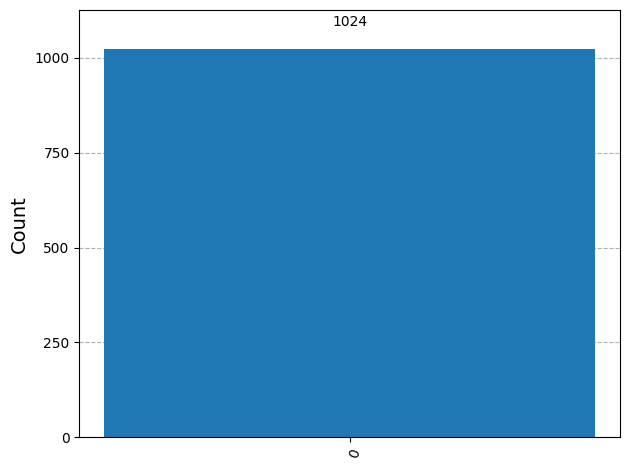

In [9]:
counts = fq.run(qc)
plot_histogram(counts)

Lo stato di $x$ è generalizzato come:

$$
(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle
$$



Il circuito dell'oracolo dipende dalla funzione che vogliamo testare. In particolare, abbiamo:

##### $f(x) = x$
<pre style="word-wrap: normal;white-space: pre;background: #fff0;line-height: 1.1;font-family: &quot;Courier New&quot;,Courier,monospace">
    q_0: ──■──
         ┌─┴─┐
    q_1: ┤ X ├
         └───┘
</pre>

##### $f(x) = \lnot x$
<pre style="word-wrap: normal;white-space: pre;background: #fff0;line-height: 1.1;font-family: &quot;Courier New&quot;,Courier,monospace">
    q_0: ──■───────
         ┌─┴─┐┌───┐
    q_1: ┤ X ├┤ X ├
         └───┘└───┘
</pre>

##### $f(x) = 0 \ \forall x$
<pre style="word-wrap: normal;white-space: pre;background: #fff0;line-height: 1.1;font-family: &quot;Courier New&quot;,Courier,monospace">
    q_0: ────
        
    q_1: ────
</pre>
##### $f(x) = 1 \ \forall x$
<pre style="word-wrap: normal;white-space: pre;background: #fff0;line-height: 1.1;font-family: &quot;Courier New&quot;,Courier,monospace">
    q_0: ─────
         ┌───┐
    q_1: ┤ X ├
         └───┘
</pre>
